In [33]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.2.1-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
Pandas 2.1.1
Scikit-Learn 1.2.2
GPU is available


In [34]:
# IMPORTING STATEMENTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import mutual_information_regression as mri
#import helper_functions_fs as hf

np.random.seed(7)

In [35]:
from sklearn.preprocessing import StandardScaler

# Import the Data

In [36]:
# training data
data = pd.read_csv('../0_data/train.csv', index_col=0).reset_index(drop=True)
data.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  \
0         3.750          5.631                    96500           4693   
1         4.375          5.745                    93258           3194   
2         2.750         21.300                    82260           6344   
3         3.375          4.000                    71172           9776   
4         4.250          8.000                    65755           3800   

   HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...  \
0         69400  72.0           360    65    61           21.76  ...   
1         94200  79.0           360    34     0           30.74  ...   
2         81700  99.0           360    32    56           27.87  ...   
3         76700  80.0           360    25    25            9.00  ...   
4         73100  80.0           360    30     0           12.00  ...   

   State_31  State_39  State_42  State_48  State_55  State_infrequent_sklearn  \
0       0.0       0.0       0.0       0.0       1.0                       0.0   
1       0.0       0.0       0.0       0.0       1.0                       0.0   
2       0.0       0.0       0.0       0.0       0.0                       0.0   
3       0.0       1.0       0.0       0.0       0.0                       0.0   
4       0.0       1.0       0.0       0.0       0.0                       0.0   

   Minority_Min  Minority_Missing  Minority_White  Borrower2Dummy  
0           0.0               0.0             1.0               1  
1           0.0               0.0             1.0               0  
2           0.0               0.0             1.0               1  
3           0.0               0.0             1.0               1  
4           0.0               0.0             1.0               0  

[5 rows x 74 columns]

In [37]:
data.columns

Index(['InterestRate', 'MinorityRatio', 'CensusTractMedFamIncome',
       'MonthlyIncome', 'HUDMedIncome', 'LTV', 'PaymentCount', 'Age1', 'Age2',
       'HousingExpense', 'DebtExpense', 'PMI', 'CreditScore1', 'CreditScore2',
       'NoteDate', 'NoteAmount', 'BorrowerCount', 'FirstTime', 'SelfEmployed',
       'Bank_Boston', 'Bank_Chicago', 'Bank_Cincinnati', 'Bank_Dallas',
       'Bank_Des Moines', 'Bank_Indianapolis', 'Bank_Pittsburgh',
       'Bank_Topeka', 'Bank_infrequent_sklearn', 'LoanPurpose_1',
       'LoanPurpose_2', 'LoanPurpose_6', 'MortgageType_0',
       'MortgageType_infrequent_sklearn', 'Gender1_1', 'Gender1_2',
       'Gender1_3', 'Gender2_1', 'Gender2_2', 'Gender2_3', 'Gender2_4',
       'PropertyType_1', 'PropertyType_6', 'PropertyType_7',
       'PropertyType_infrequent_sklearn', 'Race1_2', 'Race1_5', 'Race1_6',
       'Race1_infrequent_sklearn', 'Minority2_Min', 'Minority2_Missing',
       'Minority2_White', 'Race2_5', 'Race2_6', 'Race2_8',
       'Race2_infrequent_

In [38]:
data.drop(['Borrower2Dummy', 'Bank_infrequent_sklearn', 'LoanPurpose_6','MortgageType_infrequent_sklearn', 
           'Gender1_2', 'Gender2_2', 'PropertyType_infrequent_sklearn', 'Race1_infrequent_sklearn', 'Minority2_White', 
           'Race2_infrequent_sklearn','State_infrequent_sklearn', 'Minority_White'
          ], axis=1, inplace=True)

In [39]:
# defining response variable and input features
y = data.pop('InterestRate')
X = data.copy()

In [40]:
# test data
data_test = pd.read_csv('../0_data/test.csv', index_col=0).reset_index(drop=True)
data_test.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  \
0         4.000         47.950                    80357          18334   
1         3.250          6.489                   112882          10065   
2         3.475          9.661                   118045          19272   
3         3.125          5.172                   100096           5171   
4         4.750          4.396                    91638          14262   

   HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...  \
0         95900  80.0           360    39     0           17.07  ...   
1         86200  72.0           360    64    66           20.14  ...   
2         82300  72.0           360    62    62           14.70  ...   
3         89200  80.0           180    43     0           25.31  ...   
4         79600  80.0           360    39    31           12.66  ...   

   State_31  State_39  State_42  State_48  State_55  State_infrequent_sklearn  \
0       0.0       0.0       0.0       1.0       0.0                       0.0   
1       0.0       0.0       0.0       0.0       0.0                       1.0   
2       0.0       0.0       0.0       0.0       1.0                       0.0   
3       0.0       0.0       0.0       0.0       0.0                       0.0   
4       0.0       0.0       0.0       0.0       0.0                       0.0   

   Minority_Min  Minority_Missing  Minority_White  Borrower2Dummy  
0           0.0               0.0             1.0               0  
1           0.0               0.0             1.0               1  
2           0.0               1.0             0.0               1  
3           0.0               0.0             1.0               0  
4           0.0               0.0             1.0               1  

[5 rows x 74 columns]

In [41]:
data_test.drop(['Borrower2Dummy', 'Bank_infrequent_sklearn', 'MortgageType_infrequent_sklearn', 'Gender1_2',
           'Gender2_2', 'PropertyType_infrequent_sklearn', 'Race1_infrequent_sklearn', 'Minority2_White', 
           'Race2_infrequent_sklearn','State_infrequent_sklearn', 'Minority_White', 'LoanPurpose_6'
          ], axis=1, inplace=True)

In [42]:
y_test = data_test.pop('InterestRate')
X_test = data_test.copy()

# Scaling: Standardization
It helps in cases where the features have different units or scales, and you want to ensure that no single feature dominates the learning process.

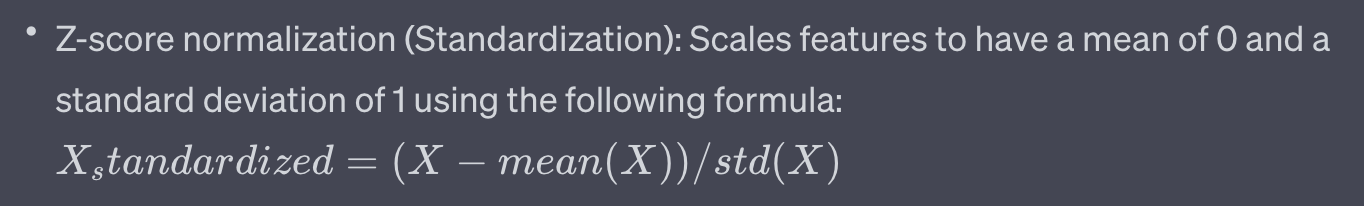


Standardization:
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.





### ONLY NUMERICAL VARS




In [43]:
numerical = pd.read_csv('../0_data/numerical.csv', index_col=0)
numerical

0
0              InterestRate
1             MinorityRatio
2   CensusTractMedFamIncome
3             MonthlyIncome
4              HUDMedIncome
5                       LTV
6              PaymentCount
7                      Age1
8                      Age2
9            HousingExpense
10              DebtExpense
11                      PMI
12             CreditScore1
13             CreditScore2
14                 NoteDate
15               NoteAmount

In [44]:
# separate numerical and dummies

X_num = pd.concat([X.pop(col) for col in list(numerical.iloc[1:,0])], axis=1)
X['BorrowerCount'] = X['BorrowerCount']-1

X_test_num = pd.concat([X_test.pop(col) for col in list(numerical.iloc[1:,0])], axis=1)
X_test['BorrowerCount'] = X_test['BorrowerCount']-1

In [45]:
X_num.head()

MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  HUDMedIncome   LTV  \
0          5.631                    96500           4693         69400  72.0   
1          5.745                    93258           3194         94200  79.0   
2         21.300                    82260           6344         81700  99.0   
3          4.000                    71172           9776         76700  80.0   
4          8.000                    65755           3800         73100  80.0   

   PaymentCount  Age1  Age2  HousingExpense  DebtExpense  PMI  CreditScore1  \
0           360    65    61           21.76        41.21  0.0             2   
1           360    34     0           30.74        42.45  0.0             5   
2           360    32    56           27.87        34.72  0.0             3   
3           360    25    25            9.00        10.00  0.0             5   
4           360    30     0           12.00        23.00  0.0             4   

   CreditScore2  NoteDate  NoteAmount  
0             2      2019      146000  
1             9      2019      129000  
2             4      2020      311258  
3             5      2020      130000  
4             9      2019       72000

In [46]:
X.head()

BorrowerCount  FirstTime  SelfEmployed  Bank_Boston  Bank_Chicago  \
0              1          0             0          0.0           1.0   
1              0          1             1          0.0           1.0   
2              1          1             0          0.0           0.0   
3              1          1             0          0.0           0.0   
4              0          0             1          0.0           0.0   

   Bank_Cincinnati  Bank_Dallas  Bank_Des Moines  Bank_Indianapolis  \
0              0.0          0.0              0.0                0.0   
1              0.0          0.0              0.0                0.0   
2              0.0          0.0              0.0                0.0   
3              1.0          0.0              0.0                0.0   
4              1.0          0.0              0.0                0.0   

   Bank_Pittsburgh  ...  State_26  State_27  State_29  State_31  State_39  \
0              0.0  ...       0.0       0.0       0.0       0.0       0.0   
1              0.0  ...       0.0       0.0       0.0       0.0       0.0   
2              0.0  ...       0.0       0.0       0.0       0.0       0.0   
3              0.0  ...       0.0       0.0       0.0       0.0       1.0   
4              0.0  ...       0.0       0.0       0.0       0.0       1.0   

   State_42  State_48  State_55  Minority_Min  Minority_Missing  
0       0.0       0.0       1.0           0.0               0.0  
1       0.0       0.0       1.0           0.0               0.0  
2       0.0       0.0       0.0           0.0               0.0  
3       0.0       0.0       0.0           0.0               0.0  
4       0.0       0.0       0.0           0.0               0.0  

[5 rows x 46 columns]

In [47]:
# scale numerical vars 
ss = StandardScaler()
X_train_num = ss.fit_transform(X_num)
X_test_num = ss.transform(X_test_num)
X_num = pd.DataFrame(X_train_num, columns=list(numerical.iloc[1:,0]))
X_test_num = pd.DataFrame(X_test_num, columns=list(numerical.iloc[1:,0]))
X_num.describe()

/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  HUDMedIncome  \
count   1.890790e+05             1.890790e+05   1.890790e+05  1.890790e+05   
mean   -2.335544e-16             4.329118e-17   6.898592e-17 -1.819958e-16   
std     1.000003e+00             1.000003e+00   1.000003e+00  1.000003e+00   
min    -9.829129e-01            -2.968603e+00  -1.541693e+00 -3.136269e+00   
25%    -6.899229e-01            -6.907823e-01  -6.998868e-01 -6.839963e-01   
50%    -3.806037e-01            -2.074440e-01  -2.267679e-01 -6.296614e-02   
75%     2.836096e-01             5.193869e-01   4.021168e-01  5.102925e-01   
max     3.195775e+00             4.143399e+00   3.701777e+00  3.949844e+00   

                LTV  PaymentCount          Age1          Age2  HousingExpense  \
count  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05    1.890790e+05   
mean   6.964825e-16  2.689164e-16 -2.288664e-16  4.235170e-17    1.323913e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00    1.000003e+00   
min   -8.617748e-01 -3.667909e+00 -2.003581e+00 -1.101219e+00   -2.410365e+00   
25%   -8.617748e-01 -2.778056e-01 -8.066413e-01 -1.101219e+00   -7.202951e-01   
50%   -9.168695e-02  5.697203e-01 -1.333627e-01  1.920703e-01   -1.531912e-01   
75%    1.650090e-01  5.697203e-01  6.895334e-01  7.761363e-01    5.862923e-01   
max    5.170580e+00  5.697203e-01  3.981118e+00  2.862086e+00    4.372398e+00   

        DebtExpense           PMI  CreditScore1  CreditScore2      NoteDate  \
count  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05   
mean   6.650381e-16  3.112493e-17  2.442832e-16  2.375942e-16  2.158467e-14   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.148844e+00 -4.158231e-01 -4.275040e+00 -2.317892e+00 -7.010553e+00   
25%   -7.560665e-01 -4.158231e-01 -5.143845e-01 -5.737875e-01 -1.000778e+00   
50%    8.581993e-03 -4.158231e-01  7.391671e-01 -5.737875e-01  2.011766e-01   
75%    7.836339e-01 -4.158231e-01  7.391671e-01  1.170317e+00  1.403131e+00   
max    5.361121e+00  7.908332e+00  7.391671e-01  1.170317e+00  1.403131e+00   

         NoteAmount  
count  1.890790e+05  
mean  -4.906427e-17  
std    1.000003e+00  
min   -1.761821e+00  
25%   -7.500204e-01  
50%   -2.017936e-01  
75%    5.519377e-01  
max    4.433948e+00

In [48]:
# merge back together numerical and dummies
X = pd.concat([X, X_num], axis=1, ignore_index=False)
X_test = pd.concat([X_test, X_test_num], axis=1,ignore_index=False)

In [49]:
X

BorrowerCount  FirstTime  SelfEmployed  Bank_Boston  Bank_Chicago  \
0                   1          0             0          0.0           1.0   
1                   0          1             1          0.0           1.0   
2                   1          1             0          0.0           0.0   
3                   1          1             0          0.0           0.0   
4                   0          0             1          0.0           0.0   
...               ...        ...           ...          ...           ...   
189074              1          0             0          0.0           0.0   
189075              1          0             0          0.0           1.0   
189076              1          0             0          0.0           0.0   
189077              1          0             0          0.0           0.0   
189078              0          0             0          0.0           0.0   

        Bank_Cincinnati  Bank_Dallas  Bank_Des Moines  Bank_Indianapolis  \
0                   0.0          0.0              0.0                0.0   
1                   0.0          0.0              0.0                0.0   
2                   0.0          0.0              0.0                0.0   
3                   1.0          0.0              0.0                0.0   
4                   1.0          0.0              0.0                0.0   
...                 ...          ...              ...                ...   
189074              0.0          0.0              0.0                0.0   
189075              0.0          0.0              0.0                0.0   
189076              0.0          0.0              0.0                0.0   
189077              0.0          1.0              0.0                0.0   
189078              0.0          0.0              0.0                0.0   

        Bank_Pittsburgh  ...  PaymentCount      Age1      Age2  \
0                   0.0  ...      0.569720  1.512429  1.443640   
1                   0.0  ...      0.569720 -0.806641 -1.101219   
2                   0.0  ...      0.569720 -0.956259  1.235045   
3                   0.0  ...      0.569720 -1.479920 -0.058244   
4                   0.0  ...      0.569720 -1.105876 -1.101219   
...                 ...  ...           ...       ...       ...   
189074              0.0  ...      0.569720  0.614725  0.859574   
189075              0.0  ...      0.569720 -0.507406  0.484103   
189076              1.0  ...      0.569720 -1.554729 -0.099963   
189077              0.0  ...      0.569720 -0.657024  0.567541   
189078              0.0  ...     -1.125331  0.390298 -1.101219   

        HousingExpense  DebtExpense       PMI  CreditScore1  CreditScore2  \
0             0.307737     1.138389 -0.415823     -3.021488     -1.881866   
1             1.429453     1.267391 -0.415823      0.739167      1.170317   
2             1.070954     0.463210 -0.415823     -1.767936     -1.009814   
3            -1.286150    -2.108506 -0.415823      0.739167     -0.573787   
4            -0.911412    -0.756066 -0.415823     -0.514385      1.170317   
...                ...          ...       ...           ...           ...   
189074       -0.985110     1.531637  2.785775     -0.514385     -1.009814   
189075       -0.893924    -1.587297 -0.415823      0.739167     -0.573787   
189076       -0.986359    -0.797680 -0.415823     -0.514385     -1.009814   
189077        3.133263     1.758431 -0.415823     -1.767936     -1.445840   
189078        0.412664     1.305884 -0.415823     -3.021488      1.170317   

        NoteDate  NoteAmount  
0      -1.000778   -0.677461  
1      -1.000778   -0.814518  
2       0.201177    0.654875  
3       0.201177   -0.806455  
4      -1.000778   -1.274061  
...          ...         ...  
189074 -1.000778    0.366589  
189075  1.403131    1.138540  
189076  1.403131   -0.931419  
189077 -1.000778   -0.201794  
189078  1.403131   -0.008302  

[189079 rows x 61 columns]

In [50]:
# dependent variables
ss_y = StandardScaler()
y = ss_y.fit_transform(np.array(y).reshape(-1, 1))
y_test = ss_y.transform(np.array(y_test).reshape(-1, 1))
pd.Series(y.flatten()).describe()

count    1.890790e+05
mean    -1.981173e-16
std      1.000003e+00
min     -2.684678e+00
25%     -7.623710e-01
50%     -1.856790e-01
75%      5.832437e-01
max      4.427857e+00
dtype: float64

# TODO: Scoring Methods

We define a helper function to save the scores for each model and make a final comparison.

The metrics we will analyse are: 
- MSE: Mean Squared Error
- MAE: Mean Absolute Error
- MR: Mean Residual
- **R2 ???????**
- **FAIRNESS QUALCOSA!!! TODO!!**

# PRENDERE DA ONE NOTE !!!!

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def mean_residual(y_true, prediction):
    '''Compute the mean residual metric'''
    residuals = (y_true - prediction)
    MR = residuals.mean()
    return MR


def compute_scores(x, y_true, y_pred):
    '''Compute the following metrics for the given model: MSE, MAE, MR, r2'''
    y_true = y_true.reshape(y_pred.shape)

    MSE = mean_squared_error(y_true, y_pred)
    print(f"MSE: {MSE:.4f}")
    MAE = mean_absolute_error(y_true, y_pred)
    print(f"MAE: {MAE:.4f}")
    MR = mean_residual(y_true, y_pred)
    print(f"MR: {MR:.4f}")
    R2 = r2_score(y_true, y_pred)
    adj_R2 = 1- ((1-R2) * (x.shape[0]-1)/(x.shape[0]-x.shape[1]-1))
    print(f"adj-R2: {adj_R2:.4f}")
    return [MSE, MAE, MR, adj_R2]


def save_scores(model, scores):
    '''Store scores for the given model into a dedicated dataframe for a final comparison across models'''
    MSE, MAE, MR, r2 = scores
    pd.Series(scores).to_csv('scores/'+model)
    model_names.append(model)
    MSEs.append(MSE)
    MAEs.append(MAE)
    MRs.append(MR)
    r2s.append(r2)
    

def display_scores():
    scores_df = pd.DataFrame([model_names, MSEs, MAEs, MRs, r2s], 
                 index=['method', 'MSE', 'MAE', 'MR', 'adj R-squared']).T
    return scores_df

In [52]:
model_names, MSEs, MAEs, MRs, r2s = [],[],[],[],[]

In [53]:
def export_pred(y_pred_std, model, scaler=ss_y):
    '''Reverts model predictions to the original scale of the input data and then saves it to a csv file'''

    y_pred = scaler.inverse_transform(np.array(y_pred_std, ndmin=2)).flatten()
    np.savetxt('predictions/'+str(model)+'_pred.csv', y_pred, delimiter=",")

# MODELS

# 1. Linear Regression

In [54]:
import statsmodels.api as sm

In [55]:
#add constant to predictor variables
x = sm.add_constant(X)
#fit linear regression model
lr = sm.OLS(y, x).fit()

#view model summary
print(lr.summary(xname=list(x.columns)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7530.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:53:04   Log-Likelihood:            -1.5286e+05
No. Observations:              189079   AIC:                         3.059e+05
Df Residuals:                  189018   BIC:                         3.065e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [56]:
X_TEST = sm.add_constant(X_test)
lr_pred = lr.predict(X_TEST)
scores = compute_scores(X_TEST, y_test, lr_pred)
save_scores('LinearRegression', scores)

MSE: 0.2968
MAE: 0.4256
MR: -0.0002
adj-R2: 0.7074


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

In [57]:
export_pred(lr_pred, 'LinearRegression')

# 2. RANSAC

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

In [58]:
from sklearn import linear_model

In [59]:
# Robustly fit linear model with RANSAC algorithm to avoid outlier interference
ransac = linear_model.RANSACRegressor().fit(X, y)

/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [60]:
ransac_pred = ransac.predict(X_test)
scores = compute_scores(X_test, y_test, ransac_pred)
save_scores('RANSAC', scores)

MSE: 31771873432673628160.0000
MAE: 162019744.5886
MR: -162019744.0117
adj-R2: -31313101912863424512.0000


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [61]:
export_pred(ransac_pred, 'RANSAC')

# 3. DNN

*Wang 2022:*

- three hidden layers are used with 10 nodes in the first hidden layer, 8 nodes in the second hidden layer, and 6 nodes in the third hidden layer. 
- All layers use tanh activation function. 
- Mean square error is used as the cost function. 
- Stochastic gradient descent algorithm with a batch size of 64 and epoch of 100 is used to train the weights. 

## Neural Networks


For neural networks, we experiment with different network configurations and pick the best in terms of 
# #TODO: scegliere metriche

on the validation set. 


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [78]:
from sklearn.model_selection import train_test_split
# Splitting data with a 15/85% val train split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, random_state=7, test_size=0.15)

In [79]:
# Custom function to create the model based on the arguments passed
def create_model(layers,  activation='tanh',  X_train=X_tr): #dropout_rate,
    model = None
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim = X_train.shape[1]))
            model.add(Activation(activation))
        else:
#            model.add(Dropout(dropout_rate[i-1], seed=0))   # worse performance with dropout
            model.add(Dense(nodes))
            model.add(Activation(activation))
#            model.add(Dropout(dropout_rate, seed=0))

    # final prediction
    model.add(Dense(1)) 
    
    # compile model
    model.compile(optimizer='sgd', # stochastic gradient descent
                  loss='mean_squared_error', # loss function chosen
                  metrics=None) # TODO !
    return model


# Custom callback to calculate R2 score
class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.last_r2_score = None  # Store the last R2 score here

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data
        y_pred = self.model.predict(x_val)
        r2 = self.calculate_r2(y_val, y_pred)
        self.last_r2_score = r2  # Store the R2 score
        print(f'Validation R2 Score: {r2:.4f}')

    @staticmethod
    def calculate_r2(y_true, y_pred):
        mean_y_true = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y_true) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

We try out different configurations for the architechture of the neural network to find the most fitting one. 

(source: https://www.kdnuggets.com/2019/11/designing-neural-networks.html)

In [80]:
layers = [[10,8,6], [44, 24, 10], [16, 10, 8, 6], [54, 36, 24, 10]]   
act = 'tanh'
#dropouts = [[0, 0],[0.2, 0.1], [0.2, 0.1], [0.2,0.1,0.05], [0.2,0.1,0.05,0]]

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
scores2 = pd.DataFrame(columns=['layers','activation','val_mean_squared_error', 'val_R2'], index=np.arange(len(layers)))
histories=[]

for i, lay in enumerate(layers):
    print(f"Layer configuration number {i}: {lay}")
#    for j, act in enumerate(activations):
    print(f"activation: {act} \n")
    model = create_model(lay, activation=act) #dropouts[i],

    # Create callbacks instances
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.001,patience=10,
                                verbose=1,mode='auto')
    r2_callback = R2ScoreCallback(validation_data=(X_val, y_val))

    history = model.fit(X_tr, y_tr, validation_data=(X_val,y_val), 
                        epochs=100, batch_size=254, verbose=1, callbacks=[earlystop, r2_callback]
                       )  
    # save scores and model
    last_r2_score = r2_callback.last_r2_score # Access the last R2 score
    scores2.iloc[i,:] = [lay, act,  history.history['val_loss'][-1], last_r2_score]
    histories.append(history.history)
    path = 'saved_nn/model' + str(i) #+'.'+str(j)
    model.save(path)
    print('\n\n')

Layer configuration number 0: [10, 8, 6]
activation: tanh 

Metal device set to: Apple M2
Epoch 1/100


2023-10-12 18:29:55.323521: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.6783
633/633 [==============================] - 4s 6ms/step - loss: 0.4687 - val_loss: 0.3256
Epoch 2/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7079
633/633 [==============================] - 4s 6ms/step - loss: 0.3079 - val_loss: 0.2956
Epoch 3/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7214
633/633 [==============================] - 4s 6ms/step - loss: 0.2883 - val_loss: 0.2820
Epoch 4/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7293
633/633 [==============================] - 4s 6ms/step - loss: 0.2779 - val_loss: 0.2740
Epoch 5/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7348
633/633 [==============================] - 4s 6ms/step - loss: 0.2713 - val_loss: 0.2684
Epoch 6/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.73

887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7704
633/633 [==============================] - 4s 6ms/step - loss: 0.2322 - val_loss: 0.2324
Epoch 46/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7715
633/633 [==============================] - 4s 6ms/step - loss: 0.2318 - val_loss: 0.2312
Epoch 47/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7712
633/633 [==============================] - 4s 6ms/step - loss: 0.2315 - val_loss: 0.2315
Epoch 48/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7718
633/633 [==============================] - 4s 6ms/step - loss: 0.2312 - val_loss: 0.2309
Epoch 49/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7724
633/633 [==============================] - 4s 6ms/step - loss: 0.2309 - val_loss: 0.2303
Epoch 50/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score:

887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7809
633/633 [==============================] - 4s 6ms/step - loss: 0.2219 - val_loss: 0.2218
Epoch 90/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7816
633/633 [==============================] - 4s 6ms/step - loss: 0.2218 - val_loss: 0.2211
Epoch 91/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7814
633/633 [==============================] - 4s 6ms/step - loss: 0.2216 - val_loss: 0.2213
Epoch 92/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7817
633/633 [==============================] - 4s 6ms/step - loss: 0.2215 - val_loss: 0.2210
Epoch 93/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7817
633/633 [==============================] - 4s 6ms/step - loss: 0.2214 - val_loss: 0.2210
Epoch 93: early stopping
INFO:tensorflow:Assets written to: saved_nn/model0/assets



La

Epoch 40/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7833
633/633 [==============================] - 3s 5ms/step - loss: 0.2182 - val_loss: 0.2193
Epoch 41/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7830
633/633 [==============================] - 3s 5ms/step - loss: 0.2178 - val_loss: 0.2196
Epoch 42/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7839
633/633 [==============================] - 3s 5ms/step - loss: 0.2173 - val_loss: 0.2187
Epoch 43/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7842
633/633 [==============================] - 3s 5ms/step - loss: 0.2170 - val_loss: 0.2184
Epoch 44/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7847
633/633 [==============================] - 3s 5ms/step - loss: 0.2167 - val_loss: 0.2178
Epoch 45/100
887/887 [==============================] - 1s 1ms/step
Validat

887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7929
633/633 [==============================] - 3s 5ms/step - loss: 0.2080 - val_loss: 0.2096
Epoch 85/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7930
633/633 [==============================] - 3s 5ms/step - loss: 0.2078 - val_loss: 0.2095
Epoch 86/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7925
633/633 [==============================] - 3s 5ms/step - loss: 0.2077 - val_loss: 0.2100
Epoch 87/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7923
633/633 [==============================] - 3s 5ms/step - loss: 0.2076 - val_loss: 0.2102
Epoch 88/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7916
633/633 [==============================] - 3s 5ms/step - loss: 0.2075 - val_loss: 0.2109
Epoch 88: early stopping
INFO:tensorflow:Assets written to: saved_nn/model1/assets



La

Epoch 40/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7771
633/633 [==============================] - 4s 6ms/step - loss: 0.2260 - val_loss: 0.2256
Epoch 41/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7777
633/633 [==============================] - 4s 6ms/step - loss: 0.2255 - val_loss: 0.2250
Epoch 42/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7768
633/633 [==============================] - 4s 6ms/step - loss: 0.2250 - val_loss: 0.2259
Epoch 43/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7783
633/633 [==============================] - 4s 6ms/step - loss: 0.2246 - val_loss: 0.2243
Epoch 44/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7775
633/633 [==============================] - 4s 6ms/step - loss: 0.2244 - val_loss: 0.2251
Epoch 45/100
887/887 [==============================] - 1s 1ms/step
Validat

887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7864
633/633 [==============================] - 4s 6ms/step - loss: 0.2159 - val_loss: 0.2161
Epoch 85/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7858
633/633 [==============================] - 4s 6ms/step - loss: 0.2158 - val_loss: 0.2168
Epoch 86/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7866
633/633 [==============================] - 4s 6ms/step - loss: 0.2157 - val_loss: 0.2160
Epoch 87/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7872
633/633 [==============================] - 4s 6ms/step - loss: 0.2156 - val_loss: 0.2154
Epoch 88/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7865
633/633 [==============================] - 4s 6ms/step - loss: 0.2154 - val_loss: 0.2161
Epoch 89/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score:

Epoch 38/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7840
633/633 [==============================] - 4s 6ms/step - loss: 0.2179 - val_loss: 0.2186
Epoch 39/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7844
633/633 [==============================] - 4s 6ms/step - loss: 0.2174 - val_loss: 0.2181
Epoch 40/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7845
633/633 [==============================] - 4s 6ms/step - loss: 0.2169 - val_loss: 0.2181
Epoch 41/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7850
633/633 [==============================] - 4s 6ms/step - loss: 0.2167 - val_loss: 0.2176
Epoch 42/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7854
633/633 [==============================] - 4s 6ms/step - loss: 0.2161 - val_loss: 0.2172
Epoch 43/100
887/887 [==============================] - 1s 1ms/step
Validat

887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7942
633/633 [==============================] - 4s 6ms/step - loss: 0.2061 - val_loss: 0.2083
Epoch 83/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7920
633/633 [==============================] - 4s 6ms/step - loss: 0.2060 - val_loss: 0.2105
Epoch 84/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7949
633/633 [==============================] - 4s 6ms/step - loss: 0.2058 - val_loss: 0.2076
Epoch 85/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7949
633/633 [==============================] - 4s 6ms/step - loss: 0.2056 - val_loss: 0.2076
Epoch 86/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7952
633/633 [==============================] - 4s 6ms/step - loss: 0.2055 - val_loss: 0.2073
Epoch 87/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score:

In [83]:
scores2 # first layer config is from Wang 2022

layers activation val_mean_squared_error    val_R2
0        [10, 8, 6]       tanh               0.220965  0.781666
1      [44, 24, 10]       tanh               0.210913  0.791598
2    [16, 10, 8, 6]       tanh               0.215958  0.786613
3  [54, 36, 24, 10]       tanh                0.20575  0.796699

# TODO: reimport the chosen model and predict


In [84]:
from tensorflow.keras import models

# TODO:
best_nn = models.load_model('saved_nn/model' + '3')

In [85]:
nn_pred = best_nn.predict(X_test)
scores = compute_scores(X_test, y_test, nn_pred)
save_scores('NeuralNetwork', scores)

1478/1478 [==============================] - 2s 1ms/step
MSE: 0.2070
MAE: 0.3519
MR: -0.0162
adj-R2: 0.7960


In [86]:
export_pred(nn_pred, 'NeuralNetwork')

In [87]:
display_scores()

method                     MSE               MAE  \
0  LinearRegression                0.296848          0.425571   
1            RANSAC  31771873432673628160.0  162019744.588618   
2      LightGBM_def                0.196802          0.341189   
3          LightGBM                0.175239          0.320756   
4     NeuralNetwork                0.207029          0.351936   

                 MR           adj R-squared  
0         -0.000165                0.707432  
1 -162019744.011729 -31313101912863424512.0  
2          0.006696                 0.80604  
3          0.006526                0.827291  
4          -0.01615                 0.79596

done twice, picked model config n 1, less complex and same results as last one 

# 4. Regression Tree

In [91]:
import warnings 
warnings.filterwarnings("ignore")

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [89]:
tree = GridSearchCV(
    DecisionTreeRegressor(max_depth=2),
    param_grid={"max_depth": range(3,22,3)}, 
    scoring= 'neg_mean_squared_error', 
    verbose=3)

In [90]:
tree.fit(X, y)
print(f"\nBest Tree with params: {tree.best_params_} and MSE: {tree.best_score_:.3f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 1/5] END ......................max_depth=3;, score=-0.311 total time=   0.4s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 2/5] END ......................max_depth=3;, score=-0.313 total time=   0.3s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 3/5] END ......................max_depth=3;, score=-0.311 total time=   0.3s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 4/5] END ......................max_depth=3;, score=-0.306 total time=   0.3s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 5/5] END ......................max_depth=3;, score=-0.313 total time=   0.3s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 1/5] END ......................max_depth=6;, score=-0.257 total time=   0.6s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 2/5] END ......................max_depth=6;, score=-0.256 total time=   0.6s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 3/5] END ......................max_depth=6;, score=-0.254 total time=   0.6s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 4/5] END ......................max_depth=6;, score=-0.255 total time=   0.6s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 5/5] END ......................max_depth=6;, score=-0.256 total time=   0.6s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 1/5] END ......................max_depth=9;, score=-0.233 total time=   0.9s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 2/5] END ......................max_depth=9;, score=-0.233 total time=   1.0s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 3/5] END ......................max_depth=9;, score=-0.231 total time=   1.0s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 4/5] END ......................max_depth=9;, score=-0.230 total time=   0.9s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 5/5] END ......................max_depth=9;, score=-0.232 total time=   1.0s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 1/5] END .....................max_depth=12;, score=-0.228 total time=   1.2s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 2/5] END .....................max_depth=12;, score=-0.227 total time=   1.3s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 3/5] END .....................max_depth=12;, score=-0.224 total time=   1.2s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 4/5] END .....................max_depth=12;, score=-0.227 total time=   1.3s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 5/5] END .....................max_depth=12;, score=-0.224 total time=   1.2s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 1/5] END .....................max_depth=15;, score=-0.246 total time=   1.5s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 2/5] END .....................max_depth=15;, score=-0.243 total time=   1.5s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 3/5] END .....................max_depth=15;, score=-0.238 total time=   1.5s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 4/5] END .....................max_depth=15;, score=-0.244 total time=   1.5s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 5/5] END .....................max_depth=15;, score=-0.241 total time=   1.5s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 1/5] END .....................max_depth=18;, score=-0.276 total time=   1.8s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 2/5] END .....................max_depth=18;, score=-0.271 total time=   1.8s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 3/5] END .....................max_depth=18;, score=-0.266 total time=   1.7s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 4/5] END .....................max_depth=18;, score=-0.270 total time=   1.8s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 5/5] END .....................max_depth=18;, score=-0.272 total time=   1.8s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 1/5] END .....................max_depth=21;, score=-0.306 total time=   2.0s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 2/5] END .....................max_depth=21;, score=-0.301 total time=   2.1s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 3/5] END .....................max_depth=21;, score=-0.301 total time=   2.0s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 4/5] END .....................max_depth=21;, score=-0.295 total time=   1.9s


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

[CV 5/5] END .....................max_depth=21;, score=-0.305 total time=   1.9s

Best Tree with params: {'max_depth': 12} and MSE: -0.226


The optimal tree must have a depth around 12. Therefore, we perform a second cross validation around this number.

In [92]:
tree = GridSearchCV(
    DecisionTreeRegressor(max_depth=2),
    param_grid={"max_depth": range(10,15,1)},
    scoring= 'neg_mean_squared_error', 
    verbose=3)

tree.fit(X, y)
print(f"\nBest Tree with params: {tree.best_params_} and MSE: {tree.best_score_:.3f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................max_depth=10;, score=-0.229 total time=   1.1s
[CV 2/5] END .....................max_depth=10;, score=-0.228 total time=   1.1s
[CV 3/5] END .....................max_depth=10;, score=-0.228 total time=   1.1s
[CV 4/5] END .....................max_depth=10;, score=-0.227 total time=   1.1s
[CV 5/5] END .....................max_depth=10;, score=-0.227 total time=   1.1s
[CV 1/5] END .....................max_depth=11;, score=-0.229 total time=   1.1s
[CV 2/5] END .....................max_depth=11;, score=-0.227 total time=   1.1s
[CV 3/5] END .....................max_depth=11;, score=-0.225 total time=   1.1s
[CV 4/5] END .....................max_depth=11;, score=-0.225 total time=   1.1s
[CV 5/5] END .....................max_depth=11;, score=-0.225 total time=   1.1s
[CV 1/5] END .....................max_depth=12;, score=-0.228 total time=   1.2s
[CV 2/5] END .....................max_depth=12;, 

In [93]:
# Creating regression model with selected number of splits
best_tree = DecisionTreeRegressor(max_depth=tree.best_params_['max_depth'])
best_tree.fit(X, y)

DecisionTreeRegressor(max_depth=11)

In [94]:
tree_pred = best_tree.predict(X_test)
scores = compute_scores(X_test, y_test, tree_pred)
save_scores('RegressionTree', scores)

MSE: 0.2246
MAE: 0.3615
MR: 0.0001
adj-R2: 0.7786


In [95]:
export_pred(tree_pred, 'RegressionTree')

In [96]:
display_scores()

method                     MSE               MAE  \
0  LinearRegression                0.296848          0.425571   
1            RANSAC  31771873432673628160.0  162019744.588618   
2      LightGBM_def                0.196802          0.341189   
3          LightGBM                0.175239          0.320756   
4     NeuralNetwork                0.207029          0.351936   
5    RegressionTree                0.224597          0.361527   

                 MR           adj R-squared  
0         -0.000165                0.707432  
1 -162019744.011729 -31313101912863424512.0  
2          0.006696                 0.80604  
3          0.006526                0.827291  
4          -0.01615                 0.79596  
5          0.000113                0.778646

## get feature names out

In [134]:
def get_lineage(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]

    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'

            lineage.append((parent, split, threshold[parent], features[parent]))

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)

    for child in idx:
        for node in recurse(left, right, child):
            print(node)

In [135]:
get_lineage(best_tree, X.columns)

10
(9, 'r', -0.5892369151115417, 'MinorityRatio')
11
(8, 'r', -4.005665421485901, 'NoteDate')
13
(8, 'r', -4.005665421485901, 'NoteDate')
(12, 'r', 0.5, 'PropertyType_1')
14
(7, 'r', 1.1160219013690948, 'DebtExpense')
15
(6, 'r', -2.8037105798721313, 'NoteDate')
19
(6, 'r', -2.8037105798721313, 'NoteDate')
(18, 'r', 0.5, 'Race2_6')
20
(6, 'r', -2.8037105798721313, 'NoteDate')
(17, 'r', -1.041015774011612, 'CensusTractMedFamIncome')
22
(6, 'r', -2.8037105798721313, 'NoteDate')
(17, 'r', -1.041015774011612, 'CensusTractMedFamIncome')
(21, 'r', 0.5, 'Race2_5')
24
(6, 'r', -2.8037105798721313, 'NoteDate')
(17, 'r', -1.041015774011612, 'CensusTractMedFamIncome')
(21, 'r', 0.5, 'Race2_5')
(23, 'r', -0.48494818806648254, 'HUDMedIncome')
25
(6, 'r', -2.8037105798721313, 'NoteDate')
(16, 'r', -0.7347915768623352, 'CensusTractMedFamIncome')
29
(6, 'r', -2.8037105798721313, 'NoteDate')
(16, 'r', -0.7347915768623352, 'CensusTractMedFamIncome')
(28, 'r', -0.7602927386760712, 'MinorityRatio')
30
(6,

# 5. Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

## GRIDSEARCH CV

https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest citare !! per numero di trees:

"The analysis of 29 datasets shows that from128 trees there is no more signiﬁcant diﬀerence between the forests using 256, 512,1024, 2048 and 4096 trees. The mean and the median AUC values do not presentmajor changes from 64 trees. Therefore, it is possible to suggest, based on the ex-periments, a range between 64 and 128 trees in a forest"

In [98]:
yf= y.flatten()

In [137]:
forest = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid = {'n_estimators': [2,4, 8, 16, 32, 64, 96, 128], 
                  'max_depth': range(5,46,5)},
    scoring= 'neg_mean_squared_error',
    verbose=2)


forest.fit(X,yf)

print(f"\nBest RandomForest with params: {forest.best_params_} and MSE: {forest.best_score_:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.7s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.7s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.7s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.7s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.7s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.4s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.4s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.4s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.4s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.4s
[CV] END ........................max_depth=5, n_estimators=8; total time=   2.7s
[CV] END ........................max_depth=5, n

[CV] END ......................max_depth=15, n_estimators=32; total time=  30.9s
[CV] END ......................max_depth=15, n_estimators=32; total time=  30.9s
[CV] END ......................max_depth=15, n_estimators=32; total time=  30.9s
[CV] END ......................max_depth=15, n_estimators=32; total time=  30.9s
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.0min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.0min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.0min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.0min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.0min
[CV] END ......................max_depth=15, n_estimators=96; total time= 1.5min
[CV] END ......................max_depth=15, n_estimators=96; total time= 1.5min
[CV] END ......................max_depth=15, n_estimators=96; total time= 1.5min
[CV] END ...................

[CV] END .......................max_depth=30, n_estimators=2; total time=   2.9s
[CV] END .......................max_depth=30, n_estimators=2; total time=   2.9s
[CV] END .......................max_depth=30, n_estimators=4; total time=   5.7s
[CV] END .......................max_depth=30, n_estimators=4; total time=   5.7s
[CV] END .......................max_depth=30, n_estimators=4; total time=   5.7s
[CV] END .......................max_depth=30, n_estimators=4; total time=   5.7s
[CV] END .......................max_depth=30, n_estimators=4; total time=   5.7s
[CV] END .......................max_depth=30, n_estimators=8; total time=  11.4s
[CV] END .......................max_depth=30, n_estimators=8; total time=  11.4s
[CV] END .......................max_depth=30, n_estimators=8; total time=  11.4s
[CV] END .......................max_depth=30, n_estimators=8; total time=  11.4s
[CV] END .......................max_depth=30, n_estimators=8; total time=  11.3s
[CV] END ...................

[CV] END ......................max_depth=40, n_estimators=64; total time= 1.6min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.6min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.6min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.6min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.6min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.3min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.3min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.4min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.4min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.3min
[CV] END .....................max_depth=40, n_estimators=128; total time= 3.1min
[CV] END .....................max_depth=40, n_estimators=128; total time= 3.1min
[CV] END ...................

In [138]:
# Creating a random forest model with the selected parameters
best_forest = RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])
best_forest.fit(X, yf)

RandomForestRegressor(max_depth=30, n_estimators=128)

In [139]:
def compare_forests(cv_results, model_name='RandomForest'):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, axs = plt.subplots(1, 1, figsize=(6,5))
    fig.suptitle("Complexity - Performance: number of estimators vs score")

    # Plot: number of estimators vs score
    ax = axs
    colors_list2 = plt.cm.Paired(np.arange(len(cv_results['param_max_depth'].unique())))
    for i,num in enumerate(cv_results['param_max_depth'].unique()):
        ax.plot(
            cv_results[  cv_results['param_max_depth']==num   ]['param_n_estimators'],#["param_max_depth"],
            cv_results[  cv_results['param_max_depth']==num   ]["mean_test_score"],
            marker="o",
            color=colors_list2[i],
            label=str(num),
        )
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel("MSE score")

    # Add legend
    axs.legend(loc="lower right", title='Depth of trees')

    plt.tight_layout()
    plt.show()

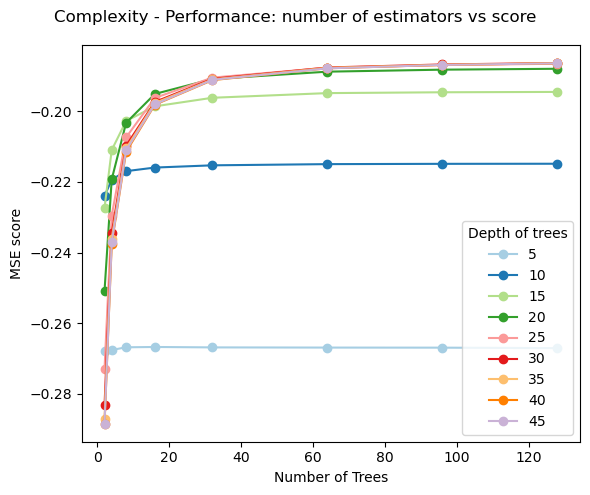

In [140]:
compare_forests( pd.DataFrame(forest.cv_results_) )

### comment? 

In [141]:
forest_pred = best_forest.predict(X_test)
scores = compute_scores(X_test, y_test, forest_pred)
save_scores('RandomForest', scores)

MSE: 0.1845
MAE: 0.3269
MR: -0.0035
adj-R2: 0.8182


In [142]:
export_pred(forest_pred, 'RandomForest')

In [143]:
display_scores()

method                     MSE               MAE  \
0   LinearRegression                0.296848          0.425571   
1             RANSAC  31771873432673628160.0  162019744.588618   
2       LightGBM_def                0.196802          0.341189   
3           LightGBM                0.175239          0.320756   
4      NeuralNetwork                0.207029          0.351936   
5     RegressionTree                0.224597          0.361527   
6       RandomForest                 0.18487          0.327436   
7        XGBoost_def                0.179449          0.324871   
8            XGBoost                0.175037           0.32057   
9        HybridModel                0.170824          0.316085   
10          Stacking                0.172097          0.316946   
11      RandomForest                 0.18448          0.326912   

                  MR           adj R-squared  
0          -0.000165                0.707432  
1  -162019744.011729 -31313101912863424512.0  
2           0.006696                 0.80604  
3           0.006526                0.827291  
4           -0.01615                 0.79596  
5           0.000113                0.778646  
6          -0.003711                  0.8178  
7          -0.000127                0.823142  
8           0.000312                0.827491  
9           0.001043                0.831642  
10          0.001274                  0.8306  
11         -0.003492                0.818184

# 6. XGBoost 

First we explore the default parameters, then move on to cross validation.

In [106]:
from xgboost import XGBRegressor
import time

In [107]:
xgbr = XGBRegressor(tree_method="hist")
start = time.time()
xgbr.fit(X, yf)
elapsed = time.time() - start
print(f'XGB Training ran in {elapsed:.5f} seconds')

XGB Training ran in 0.88298 seconds


In [108]:
xgbr_pred = xgbr.predict(X_test)
scores = compute_scores(X_test, y_test, xgbr_pred)
save_scores('XGBoost_def', scores)

MSE: 0.1794
MAE: 0.3249
MR: -0.0001
adj-R2: 0.8231


## Cross Validation

In [112]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [16, 64, 128],
    'learning_rate': [0.05, 0.2, 0.3], # def 0.3
    'max_depth': [3, 4, 6],                 # def 0.6
    'min_child_weight': [1, 2, 3],          # def 1
    'gamma': [0, 0.1, 0.2], # def 0, minimum loss reduction required for further tree splits
    'reg_alpha': [0, 0.5],      # def 0, L1 regularization to the feature weights
    'reg_lambda': [0.5, 1],     # def 1, L2 regularization to the feature weights
    'subsample': [0.8, 1.0],    # def 1
    'colsample_bytree': [0.8, 1.0]} # def 1

In [113]:
xgbr = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)


In [114]:
xgbr.fit(X, yf)

print(f"\nBest XGBRegressor with params: {xgbr.best_params_} and MSE: {xgbr.best_score_:.3f}")

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=128, r

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=62.7min
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=35.9min
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  16.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, r

In [115]:
# Creating a XGB model with the selected parameters
best_xgbr = XGBRegressor(max_depth=xgbr.best_params_['max_depth'],
                        n_estimators=xgbr.best_params_['n_estimators'],
                        learning_rate=xgbr.best_params_['learning_rate'],
                        min_child_weight=xgbr.best_params_['min_child_weight'], 
                        gamma=xgbr.best_params_['gamma'],
                        alpha=xgbr.best_params_['reg_alpha'],
                        reg_lambda=xgbr.best_params_['reg_lambda'],
                        subsample=xgbr.best_params_['subsample'],
                        colsample_bytree=xgbr.best_params_['colsample_bytree']
                        )
best_xgbr.fit(X, yf)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=128, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [116]:
xgb_pred = best_xgbr.predict(X_test)
scores = compute_scores(X_test, y_test, xgb_pred)

save_scores('XGBoost', scores)

MSE: 0.1750
MAE: 0.3206
MR: 0.0003
adj-R2: 0.8275


In [117]:
export_pred(xgb_pred, 'XGBoost')

In [118]:
display_scores()

method                     MSE               MAE  \
0  LinearRegression                0.296848          0.425571   
1            RANSAC  31771873432673628160.0  162019744.588618   
2      LightGBM_def                0.196802          0.341189   
3          LightGBM                0.175239          0.320756   
4     NeuralNetwork                0.207029          0.351936   
5    RegressionTree                0.224597          0.361527   
6      RandomForest                 0.18487          0.327436   
7       XGBoost_def                0.179449          0.324871   
8           XGBoost                0.175037           0.32057   

                 MR           adj R-squared  
0         -0.000165                0.707432  
1 -162019744.011729 -31313101912863424512.0  
2          0.006696                 0.80604  
3          0.006526                0.827291  
4          -0.01615                 0.79596  
5          0.000113                0.778646  
6         -0.003711                  0.8178  
7         -0.000127                0.823142  
8          0.000312                0.827491

# 7. Light GBM

In [64]:
from lightgbm import LGBMRegressor
import time

In [67]:
lgbm = LGBMRegressor()
start = time.time()
lgbm.fit(X, yf)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')

LGBM Training ran in 0.83772 seconds


In [68]:
lgbm_pred = lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)
save_scores('LightGBM_def', scores)

MSE: 0.1968
MAE: 0.3412
MR: 0.0067
adj-R2: 0.8060


## Cross Validation

In [69]:
# Define the parameter grid to search
param_grid = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': [3, 4, 6],                  
    'min_child_weight': [1, 2, 3], 
    'num_leaves': [8, 16, 32, 64],
    'n_estimators': [16, 64, 128],
    'reg_alpha': [0, 0.5],                   # L1 regularization
    'reg_lambda': [0.5, 1],                  # L2 regularization
}

In [72]:
lgbm = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

In [73]:
lgbm.fit(X, yf)

print(f"\nBest LGBMRegressor with params: {lgbm.best_params_} and MSE: {lgbm.best_score_:.3f}")

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[C

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsampl

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[C

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END cols

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsampl

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learnin

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytr

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learnin

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_by

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learnin

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytr

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learnin

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsampl

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] E

Best LGBMRegressor with params: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 128, 'num_leaves': 64, 'reg_alpha': 0, 'reg_lambda': 0.5} and MSE: -0.176

In [74]:
# Creating a XGB model with the selected parameters
best_lgbm = LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 
                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],
                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
                        )
best_lgbm.fit(X, yf)

LGBMRegressor(learning_rate=0.3, max_depth=6, min_child_weight=1,
              n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5)

In [75]:
lgbm_pred = best_lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)

save_scores('LightGBM', scores)

MSE: 0.1752
MAE: 0.3208
MR: 0.0065
adj-R2: 0.8273


In [76]:
export_pred(lgbm_pred, 'LightGBM')

# 8. Hybrid Regression

In [149]:
# Import predictions from csv files, which have been rescaled to the original scale
forest_pred = pd.read_csv('predictions/RandomForest_pred.csv', header=None)
xgbr_pred = pd.read_csv('predictions/XGBoost_pred.csv', header=None)
lgbm_pred = pd.read_csv('predictions/LightGBM_pred.csv', header=None)

In [150]:
# Define the weights for each model
weights = [1/3, 1/3, 1/3]  # Equal weights for each model
print(weights)
# Combine predictions using weighted average
hybrid_predictions = (weights[0] * forest_pred + 
                      weights[1] * xgbr_pred +     
                      weights[2] * lgbm_pred)

# Standardize, scale to the same scale of y_test
hybrid_predictions = ss_y.transform(np.array(hybrid_predictions).reshape(-1, 1))

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [121]:
scores = compute_scores(X_test, y_test, hybrid_predictions)
save_scores('HybridModel', scores)

MSE: 0.1708
MAE: 0.3161
MR: 0.0010
adj-R2: 0.8316


In [122]:
export_pred(hybrid_predictions, 'HybridModel')

# Cross validation

In [151]:
# Define the range and step for weights
weight_range = np.linspace(0, 1, num=11)  # You can adjust the number of weights as needed


In [152]:
weight_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [169]:
# Initialize a list to store the standardized hybrid predictions for each weight combination
standardized_hybrid_predictions = []
MSEs_hr = []

for weight_1 in weight_range:
    for weight_2 in weight_range:
        weight_3 = 1 - weight_1 - weight_2  # Ensure weights add up to 1
        weights = [weight_1, weight_2, weight_3]
        #print(weights)

        # Combine predictions using the weighted average
        hybrid_predictions = (weights[0] * forest_pred +
                              weights[1] * xgbr_pred +
                              weights[2] * lgbm_pred)

        # Standardize, scale to the same scale of y_test
        hybrid_predictions = ss_y.transform(np.array(hybrid_predictions).reshape(-1, 1))
        MSE = mean_squared_error(y_test, hybrid_predictions)

        MSEs_hr.append(MSE)
        standardized_hybrid_predictions.append((weights, hybrid_predictions))

# Now, standardized_hybrid_predictions will contain a list of tuples, each containing the weights and the standardized hybrid predictions for that weight combination.

In [170]:
weights, hybrid_pred = standardized_hybrid_predictions[pd.Series(MSEs_hr).idxmin()]

In [172]:
print(weights)
scores = compute_scores(X_test, y_test, hybrid_pred)
save_scores('HybridModel_CV', scores)

[0.2, 0.4, 0.4]
MSE: 0.1707
MAE: 0.3161
MR: 0.0020
adj-R2: 0.8318


In [173]:
display_scores()

method       MSE               MAE                MR  \
0   LinearRegression  0.170655          0.425571         -0.000165   
1             RANSAC      None  162019744.588618 -162019744.011729   
2       LightGBM_def      None          0.341189          0.006696   
3           LightGBM      None          0.320756          0.006526   
4      NeuralNetwork      None          0.351936          -0.01615   
5     RegressionTree      None          0.361527          0.000113   
6       RandomForest      None          0.327436         -0.003711   
7        XGBoost_def      None          0.324871         -0.000127   
8            XGBoost      None           0.32057          0.000312   
9        HybridModel      None          0.316085          0.001043   
10          Stacking      None          0.316946          0.001274   
11      RandomForest      None          0.326912         -0.003492   
12    HybridModel_CV      None          0.316146          0.002037   
13    HybridModel_CV      None          0.316146          0.002037   

             adj R-squared  
0                 0.707432  
1  -31313101912863424512.0  
2                  0.80604  
3                 0.827291  
4                  0.79596  
5                 0.778646  
6                   0.8178  
7                 0.823142  
8                 0.827491  
9                 0.831642  
10                  0.8306  
11                0.818184  
12                0.831809  
13                0.831809

# 9. Stacking
Architecture from Quang

In [123]:
from vecstack import StackingTransformer

# Initialize 1st level estimators
estimators = [('RF', RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])),
              ('LGBM', LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 
                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],
                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
              ))]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=True, verbose=2, shuffle=True, metric=mean_squared_error)

In [124]:
stack = stack.fit(X, yf)

task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [2]

estimator  0: [RF: RandomForestRegressor]
    fold  0:  [0.18660661]
    fold  1:  [0.18582075]
    fold  2:  [0.18888680]
    fold  3:  [0.18840059]
    ----
    MEAN:     [0.18742869] + [0.00125817]

estimator  1: [LGBM: LGBMRegressor]
    fold  0:  [0.17631634]
    fold  1:  [0.17580927]
    fold  2:  [0.17843058]
    fold  3:  [0.17676670]
    ----
    MEAN:     [0.17683072] + [0.00098382]



In [125]:
# Get stacked features
S_train = stack.transform(X)
S_test = stack.transform(X_test)

Train set was detected.
Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [126]:
xgbr = XGBRegressor()
start = time.time()
xgbr.fit(S_train, yf)
elapsed = time.time() - start
print(f'XGB Stacking Training ran in {elapsed:.5f} seconds')

XGB Stacking Training ran in 2.57169 seconds


In [127]:
stacking_pred = xgbr.predict(S_test)
scores = compute_scores(S_test, y_test, stacking_pred)

save_scores('Stacking', scores)

MSE: 0.1721
MAE: 0.3169
MR: 0.0013
adj-R2: 0.8306


In [128]:
export_pred(stacking_pred, 'Stacking')

# FINAL SUMMARY OF METHODS PERFORMANCES

We display below a summary of the scores obtained by the different models. 
We see that models can be classified differently based on the metric of evaluation chosen. 




In [129]:
final_scores=display_scores()

In [131]:
final_scores.to_csv('final_scores.csv')

In [130]:
final_scores

method                     MSE               MAE  \
0   LinearRegression                0.296848          0.425571   
1             RANSAC  31771873432673628160.0  162019744.588618   
2       LightGBM_def                0.196802          0.341189   
3           LightGBM                0.175239          0.320756   
4      NeuralNetwork                0.207029          0.351936   
5     RegressionTree                0.224597          0.361527   
6       RandomForest                 0.18487          0.327436   
7        XGBoost_def                0.179449          0.324871   
8            XGBoost                0.175037           0.32057   
9        HybridModel                0.170824          0.316085   
10          Stacking                0.172097          0.316946   

                  MR           adj R-squared  
0          -0.000165                0.707432  
1  -162019744.011729 -31313101912863424512.0  
2           0.006696                 0.80604  
3           0.006526                0.827291  
4           -0.01615                 0.79596  
5           0.000113                0.778646  
6          -0.003711                  0.8178  
7          -0.000127                0.823142  
8           0.000312                0.827491  
9           0.001043                0.831642  
10          0.001274                  0.8306

# analisi finali
- predictions per anno vs reale (grafica)